# Loading Dataset

In [1]:
#importing  packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading dataset

df = pd.read_csv("nyc_taxi_trip_duration.csv", header=0, parse_dates=True)


In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
#Shape of data

print ('No. of rows : ',df.shape[0])
print ('No. of Features : ', df.shape[1])

No. of rows :  729322
No. of Features :  11


# Checking for Dtype and Null Values

In [5]:
#Attribute information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [6]:
#checking missing values

df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

## EDA & Data Preprocessing

C:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Vendor ID')

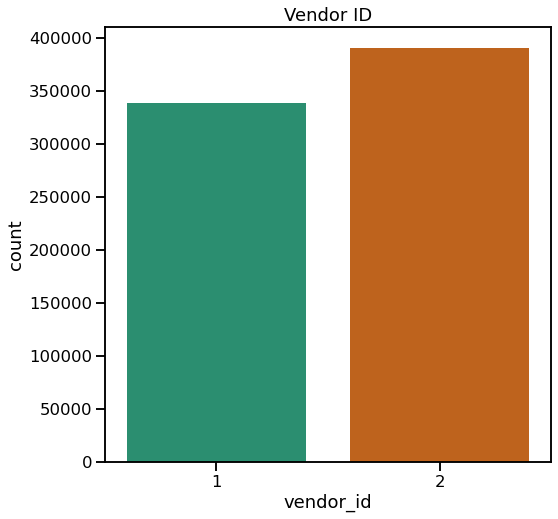

In [7]:
#vendor_id - a code indicating the provider associated with the trip record

sns.set_context('talk')

plt.figure(figsize=(8,8))
sns.countplot(df['vendor_id'], palette='Dark2')
plt.title("Vendor ID")

From Above Visualization, we can say that there are 2 vendors (Service Providers).
2nd Service provider is the most opted one by New Yorkers.

C:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_duration'>

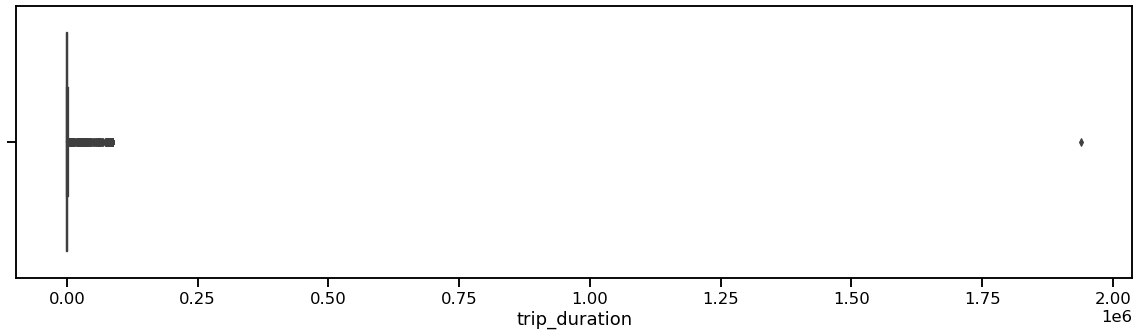

In [8]:
#Visualising Trip duration we can clearly notice few outliers at extreme right

plt.figure(figsize=(20,5))
sns.boxplot(df['trip_duration'])

C:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Passenger Count Distribution')

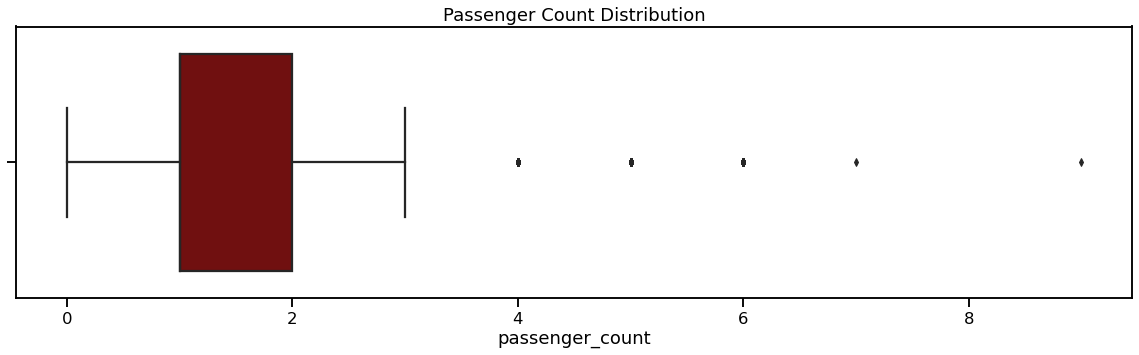

In [9]:
#Spread of Passenger count

plt.figure(figsize=(20,5))
sns.boxplot(df['passenger_count'], color='maroon')
plt.title('Passenger Count Distribution')

Most number of trips are done by 1-2 passenger(s).

C:\Users\Yash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log Transformed - Trip Duration')

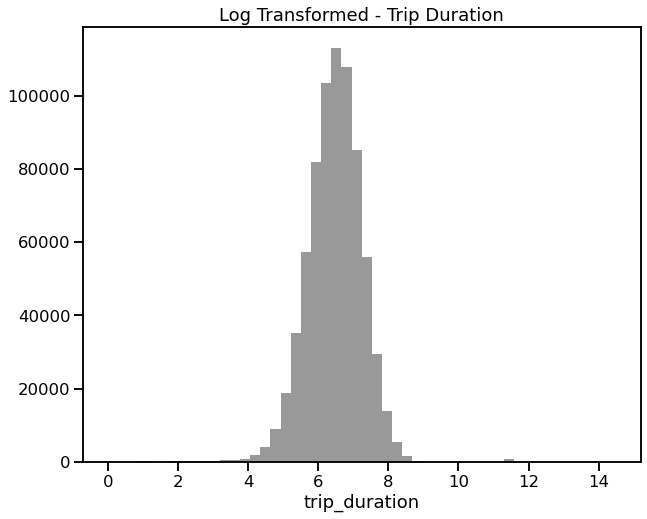

In [10]:
#Log Transformation

plt.figure(figsize=(10,8))
sns.distplot(np.log(df['trip_duration']), kde=False, color='black')
plt.title("Log Transformed - Trip Duration")

C:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='passenger_count', ylabel='count'>

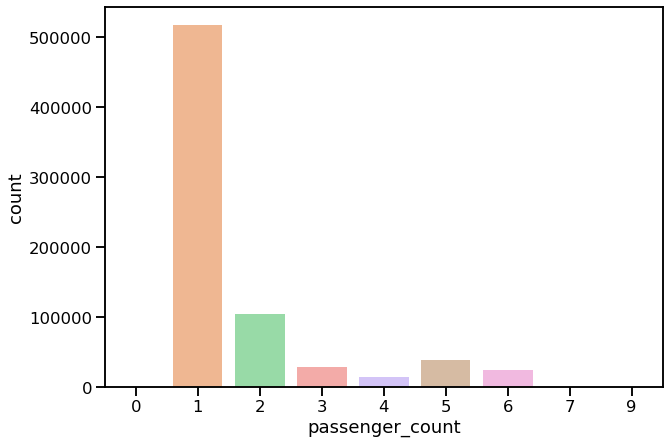

In [11]:
#Passenger count

plt.figure(figsize=(10,7))
sns.countplot(df['passenger_count'], palette='pastel')

In [12]:
#Label Encoding Features having Categorical Values

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df['store_and_fwd_flag'] = enc.fit_transform(df['store_and_fwd_flag'])
df['vendor_id'] = enc.fit_transform(df['vendor_id'])



# Feature Engineering

In [13]:
#Extracting day, month, date, hour, mins, weekday from datetime

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_date'] = df['pickup_datetime'].dt.date
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_min'] = df['pickup_datetime'].dt.minute
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday

df['dropoff_min'] = df['dropoff_datetime'].dt.minute

C:\Users\Yash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Overall Monthly trips')

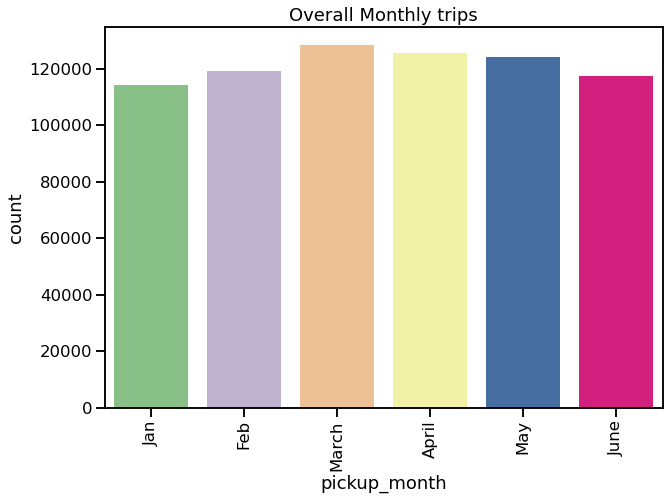

In [14]:
#monthly trips exploration

plt.figure(figsize=(10,7))
sns.countplot(df['pickup_month'], palette='Accent')
plt.xticks([0,1,2,3,4,5], labels=['Jan','Feb','March','April','May','June'], rotation=90)
plt.title('Overall Monthly trips')

Number of trips in a particular month - March and April marking the highest.



Text(0.5, 1.0, 'Hourly Pickups')

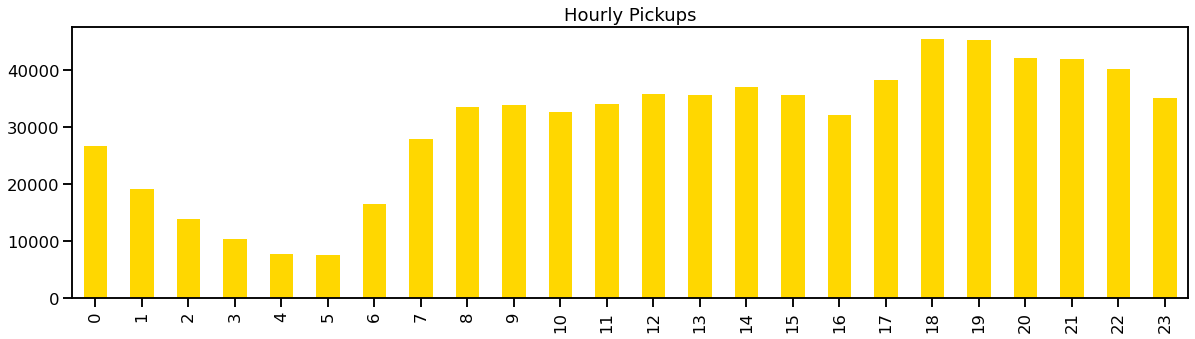

In [15]:
#Analyzing hourly pickups

plt.figure(figsize=(20,5))
pickup_hour = df['pickup_hour'].value_counts()
pickup_hour.sort_index().plot(kind='bar', color='gold')
plt.title("Hourly Pickups")

Text(0.5, 1.0, 'Overall Week day Trips')

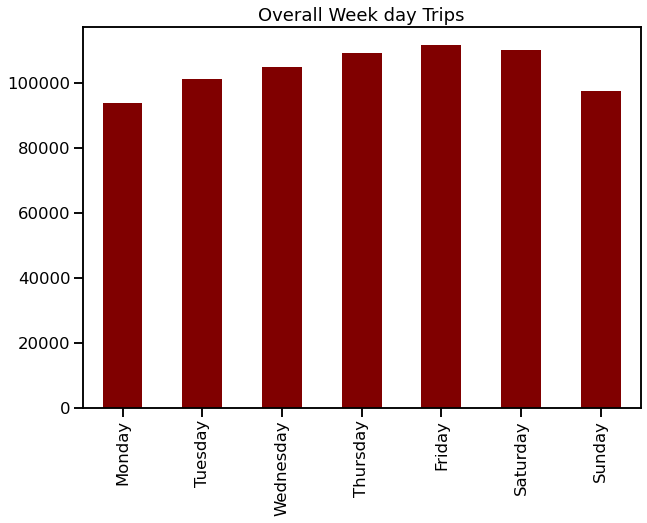

In [16]:
#Analyzing week day trips

plt.figure(figsize=(10,7))
pickup_week = df['pickup_weekday'].value_counts()
pickup_week.sort_index().plot(kind='bar', color='maroon')
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=90)
plt.title('Overall Week day Trips')

Text(0.5, 1.0, 'Daily Trips Plot')

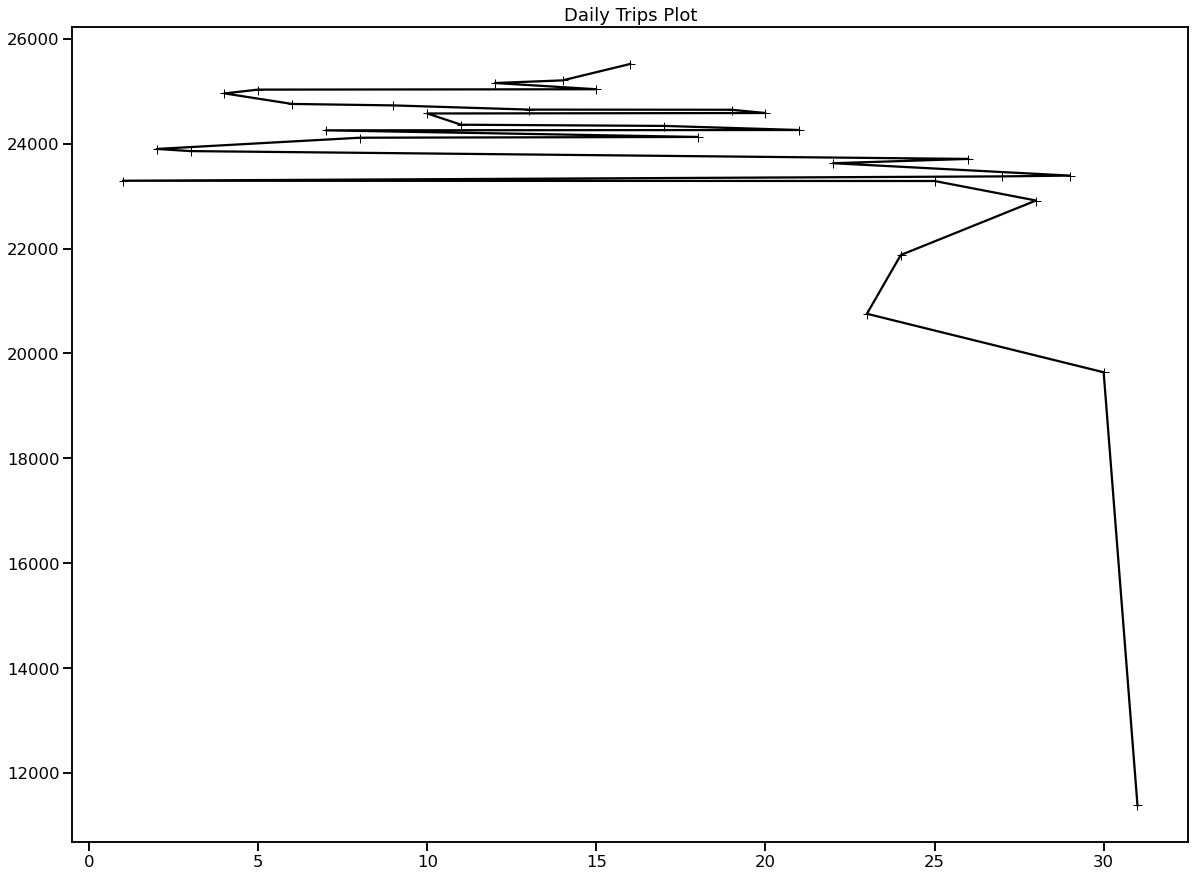

In [17]:
#Examining Daily trip

plt.figure(figsize=(20,15))
df['pickup_day'].value_counts().plot(color="black", marker="+")
plt.title('Daily Trips Plot')

In [18]:
# Correlation Heatmap

Text(0.5, 1.0, 'Correlation Plot')

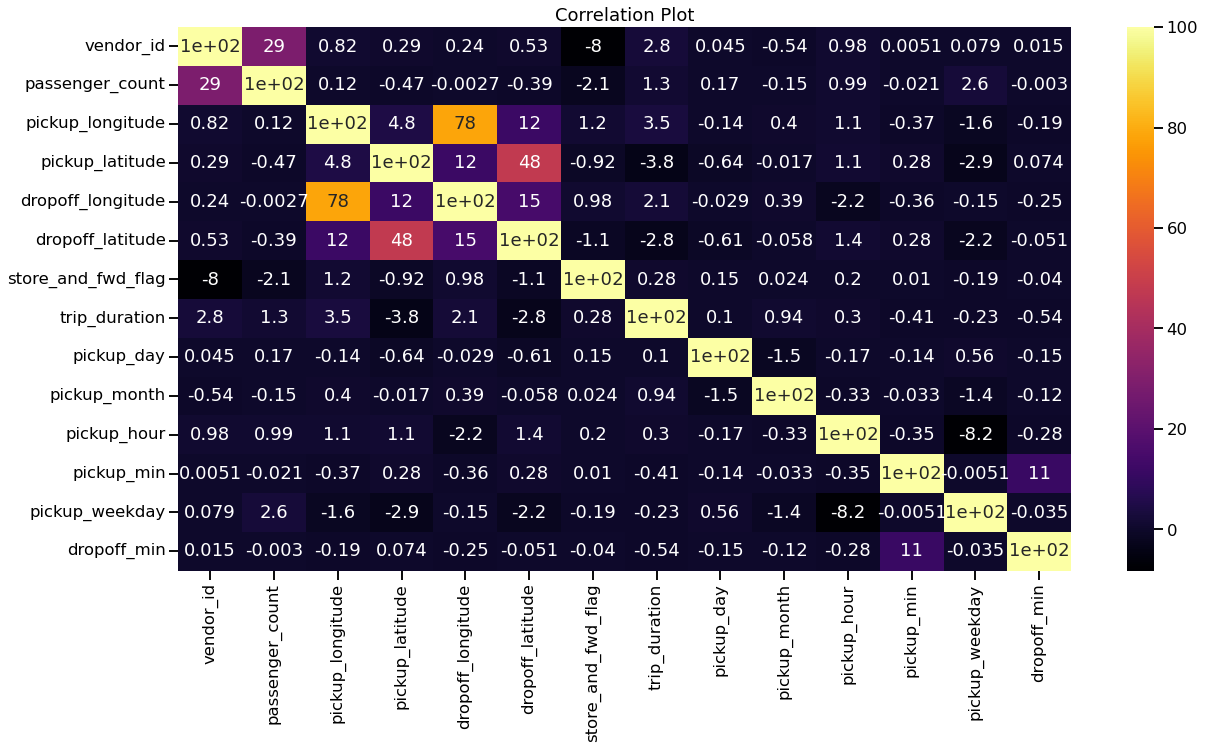

In [19]:
#Plotting Pearson Correlation heatmap

plt.figure(figsize=(20,10))
sns.heatmap(df.corr()*100, annot=True, cmap='inferno')
plt.title('Correlation Plot')

In [20]:
nyc_taxi_df = df.drop(['id','pickup_datetime','pickup_date','dropoff_datetime'], axis=1)
nyc_taxi_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,1,1,-73.953918,40.778873,-73.963875,40.771164,0,400,29,2,16,40,0,47
1,0,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,11,3,23,35,4,53
2,1,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,21,2,17,59,6,26
3,1,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,5,1,9,44,1,3
4,0,1,-74.017120,40.708469,-73.988182,40.740631,0,848,17,2,6,42,2,56


# Normalization

In [21]:
#Predictors and Target Variable

X = nyc_taxi_df.drop(['trip_duration'], axis=1)
y = np.log(nyc_taxi_df['trip_duration'])

In [22]:
# Normalising Predictors and creating new dataframe

from sklearn.preprocessing import StandardScaler

cols = X.columns

ss = StandardScaler()

new_df = ss.fit_transform(X)
new_df = pd.DataFrame(new_df, columns=cols)
new_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,0.931533,-0.504444,0.280911,0.832127,0.137198,0.538014,-0.074634,1.551526,-0.903461,0.373006,0.600161,-1.560057,0.997051
1,-1.073500,0.257493,-0.212156,-0.570815,-0.306500,-1.577382,-0.074634,-0.517495,-0.308456,1.466269,0.311683,0.486536,1.341481
2,0.931533,0.257493,-0.341220,-0.876953,0.364913,0.642175,-0.074634,0.631961,-0.903461,0.529187,1.696374,1.509832,-0.208455
3,0.931533,3.305240,0.169785,0.261980,0.239160,0.800639,-0.074634,-1.207169,-1.498465,-0.720257,0.830942,-1.048408,-1.528771
4,-1.073500,-0.504444,-0.625160,-1.263600,-0.212103,-0.309245,-0.074634,0.172178,-0.903461,-1.188799,0.715551,-0.536760,1.513696


In [23]:
X = new_df
y = np.log(nyc_taxi_df['trip_duration']).values

# K-Nearest neighbours

In [24]:
#importing KNN regressor and metric mse

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=10)

In [26]:
# Creating instance of KNN
reg = KNN(n_neighbors = 5)

# Fitting the model
reg.fit(X_train, y_train)

# Predicting over the Train Set and calculating MSE
test_predict = reg.predict(X_test)
k = mse(test_predict, y_test)
print('Test MSE    ', k )

Test MSE     0.23312015240588876


In [28]:
def Elbow(K):
  #initiating empty list
    test_mse = []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(X_train,  y_train)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(X_test)
        tmp = mse(tmp,y_test)
        test_mse.append(tmp)
    
    return test_mse

In [33]:
#Defining K range
k = range(1,20)

In [34]:
# calling above defined function
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

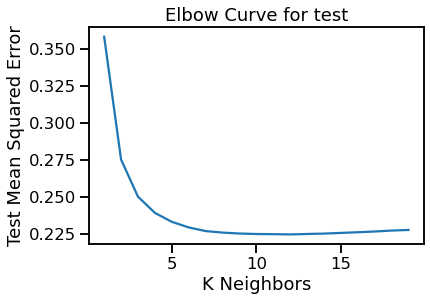

In [35]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

In [37]:
# Creating instance of KNN
reg = KNN(n_neighbors = 10)

# Fitting the model
reg.fit(X_train, y_train)

# Predicting over the Train Set and calculating MSE
test_predict = reg.predict(X_test)
k = mse(test_predict, y_test)
print('Test MSE    ', k )

Test MSE     0.2248739037958565


# Linear Regression

In [26]:

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error as mse

In [27]:

lin_regr = LinearRegression(normalize=True)
lin_regr.fit(X_train, y_train)

y_train_pred= lin_regr.predict(X_train)
y_pred= lin_regr.predict(X_test)

mse_train= mse(y_train, y_train_pred)
mse_test= mse(y_test, y_pred)

print(mse_train)
print(mse_test)

0.5911570066093547
0.9219217521392749


In [28]:
# defining a function which will fit linear regression model, plot the results, and return the coefficients
def linear_regression(train_x, train_y, test_x, test_y, features):
        
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(train_x,train_y)
    train_y_pred = linreg.predict(train_x)
    test_y_pred = linreg.predict(test_x)
    
    #Return the result in pre-defined format
    rss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    ret = [rss_train]
    
    rss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    ret.extend([rss_test])
    
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    
    return ret

# Ridge Regression

In [29]:
#Set the different values of alpha to be tested
alpha_ridge ={"0":0,"10^-8":1e-8,"10^-7":1e-7,"10^-6":1e-6,"10^-5":1e-5,"10^-4":1e-4,"0.001":1e-3,"0.01":1e-2, "1":1, "5":5, "10":10,"20":20,"25":25}

# defining a function which will fit ridge regression model, plot the results, and return the coefficients
def ridge_regression(train_x, train_y, test_x, test_y, alpha):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(train_x,train_y)
    train_y_pred = ridgereg.predict(train_x)
    test_y_pred = ridgereg.predict(test_x)
    
    return([mse(train_y, train_y_pred), mse(test_y, test_y_pred)])


df_ridge=pd.DataFrame(columns=["Alpha","Train","Test"])
print("Errors are as follows-")
for a,b in alpha_ridge.items():
    rid=ridge_regression(X_train,y_train, X_test, y_test, b)
    df_ridge=df_ridge.append({"Alpha":a,"Train":rid[0],"Test":rid[1]},ignore_index=True)
    
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:.7g}'.format
df_ridge

Errors are as follows-


,Alpha,Train,Test
0,0,0.591157,0.9219218
1,10^-8,0.591157,0.9219217
2,10^-7,0.591157,0.9219217
3,10^-6,0.591157,0.9219212
4,10^-5,0.591157,0.9219165
5,10^-4,0.591157,0.9218688
6,0.001,0.591157,0.9213928
7,0.01,0.5911599,0.9166933
8,1,0.6001196,0.7026297
9,5,0.6207319,0.6326081


# Lasso Regression

In [30]:
#Set the different values of alpha to be tested
alpha_lasso = {"0.001":1e-3,"0.01":1e-2, "1":1, "5":5, "10":10,"20": 20,"25":25}

# defining a function which will fit ridge regression model, plot the results, and return the coefficients
def lasso_regression(train_x, train_y, test_x, test_y, alpha):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True)
    lassoreg.fit(train_x,train_y)
    train_y_pred = lassoreg.predict(train_x)
    test_y_pred = lassoreg.predict(test_x)
    
    return([mse(train_y, train_y_pred), mse(test_y, test_y_pred)])


df_lasso=pd.DataFrame(columns=["Alpha","Train","Test"])
print("Errors are as follows-")
for a,b in alpha_lasso.items():
    las=lasso_regression(X_train,y_train, X_test, y_test, b)
    df_lasso=df_lasso.append({"Alpha":a,"Train":las[0],"Test":las[1]},ignore_index=True)

df_lasso

Errors are as follows-


,Alpha,Train,Test
0,0.001,0.6380995,0.636254
1,0.01,0.6380995,0.636254
2,1,0.6380995,0.636254
3,5,0.6380995,0.636254
4,10,0.6380995,0.636254
5,20,0.6380995,0.636254
6,25,0.6380995,0.636254


In [31]:
sns.set(palette="Set2")

In [32]:
df_ridge

,Alpha,Train,Test
0,0,0.591157,0.9219218
1,10^-8,0.591157,0.9219217
2,10^-7,0.591157,0.9219217
3,10^-6,0.591157,0.9219212
4,10^-5,0.591157,0.9219165
5,10^-4,0.591157,0.9218688
6,0.001,0.591157,0.9213928
7,0.01,0.5911599,0.9166933
8,1,0.6001196,0.7026297
9,5,0.6207319,0.6326081


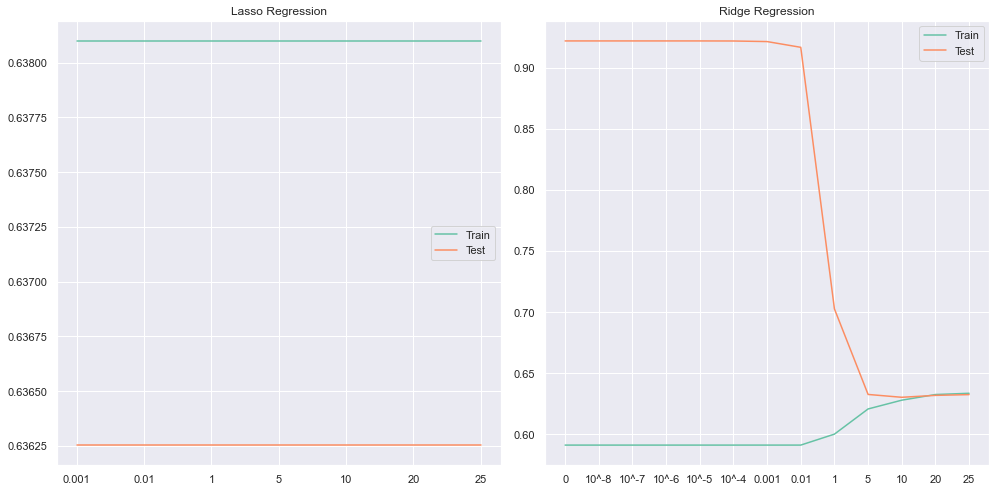

In [33]:
figure,axes= plt.subplots(nrows=1, ncols=2,figsize=(14,7))

axes[0].set_title("Lasso Regression")
axes[1].set_title("Ridge Regression")

axes[0].plot(df_lasso["Alpha"],df_lasso["Train"],label="Train")
axes[0].plot(df_lasso["Alpha"],df_lasso["Test"],label="Test")
axes[0].legend()

axes[1].plot(df_ridge["Alpha"],df_ridge["Train"],label="Train")
axes[1].plot(df_ridge["Alpha"],df_ridge["Test"],label="Test")
axes[1].legend()

plt.tight_layout()

# Decision Tree

In [34]:
#decision tree implementation

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error

est_dt = DecisionTreeRegressor(criterion="mse", max_depth=10)
est_dt.fit(X_train, y_train)
dt_pred = est_dt.predict(X_test)
dt_pred

array([6.12346543, 7.2520566 , 6.29151307, ..., 5.85857249, 6.0367221 ,
       6.37271896])

In [35]:
#examining metrics

print ("Training Score : " , est_dt.score(X_train, y_train))

print ("Validation Score : ", est_dt.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_dt, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(dt_pred, y_test))

print ("RMSLE : ", np.sqrt(mean_squared_log_error(dt_pred, y_test)))

Training Score :  0.46625742077734667
Validation Score :  0.45283277305648306
Cross Validation Score :  0.45001147339860725
R2_Score :  -0.17558979848408196
RMSLE :  0.08817274008910855


C:\Users\Yash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Test VS Prediction')

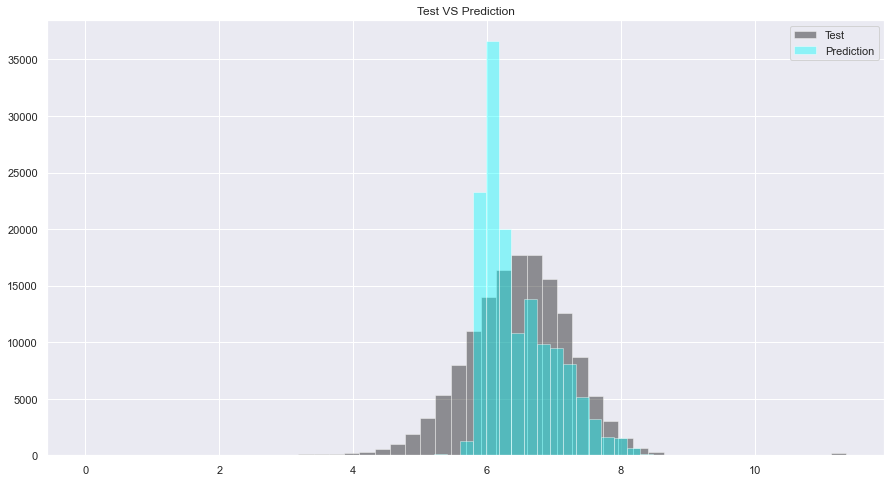

In [36]:
#prediction vs reality check

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(dt_pred, kde=False, color="cyan", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")